In [1]:
import pandas as pd
import numpy as np


import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

file = "C:/Users/TYS/Documents/study/Master/INSY662/group project/Real Code/INSY662-Group-Project/Data/dataset_demand.csv"
data = pd.read_csv(file)
data

,date,start_station_cluster,rideable_type,trip_count
0,2022/1/1,0,classic_bike,94
1,2022/1/1,0,electric_bike,196
2,2022/1/1,1,classic_bike,11
3,2022/1/1,1,electric_bike,8
4,2022/1/1,2,classic_bike,37
...,...,...,...,...
12299,2022/12/31,17,electric_bike,189
12300,2022/12/31,18,classic_bike,13
12301,2022/12/31,18,electric_bike,46
12302,2022/12/31,19,classic_bike,9


In [2]:
# Filter data for start_station_cluster 0
#cluster_data = data[data['start_station_cluster'] == 0]

# Separate data for classic bikes and electric bikes
# use data instead of cluster_data
classic_bike_data = data[data['rideable_type'] == 'classic_bike']
electric_bike_data = data[data['rideable_type'] == 'electric_bike']
all_bike_data = data

classic_bike_data.head(), electric_bike_data.head()

(       date  start_station_cluster rideable_type  trip_count
 0  2022/1/1                      0  classic_bike          94
 2  2022/1/1                      1  classic_bike          11
 4  2022/1/1                      2  classic_bike          37
 5  2022/1/1                      3  classic_bike         118
 7  2022/1/1                      4  classic_bike          65,
        date  start_station_cluster  rideable_type  trip_count
 1  2022/1/1                      0  electric_bike         196
 3  2022/1/1                      1  electric_bike           8
 6  2022/1/1                      3  electric_bike         262
 8  2022/1/1                      4  electric_bike          97
 9  2022/1/1                      6  electric_bike           8)

In [3]:
# Convert 'date' to datetime and set as index
classic_bike_data['date'] = pd.to_datetime(classic_bike_data['date'])
electric_bike_data['date'] = pd.to_datetime(electric_bike_data['date'])
all_bike_data['date'] = pd.to_datetime(all_bike_data['date'])
classic_bike_data.set_index('date', inplace=True)
electric_bike_data.set_index('date', inplace=True)
all_bike_data.set_index('date', inplace=True)

# Display the first few rows of each dataset
classic_bike_data.head(), electric_bike_data.head() 

C:\Users\TYS\AppData\Local\Temp\ipykernel_59812\3828104725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classic_bike_data['date'] = pd.to_datetime(classic_bike_data['date'])
C:\Users\TYS\AppData\Local\Temp\ipykernel_59812\3828104725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_bike_data['date'] = pd.to_datetime(electric_bike_data['date'])


(            start_station_cluster rideable_type  trip_count
 date                                                       
 2022-01-01                      0  classic_bike          94
 2022-01-01                      1  classic_bike          11
 2022-01-01                      2  classic_bike          37
 2022-01-01                      3  classic_bike         118
 2022-01-01                      4  classic_bike          65,
             start_station_cluster  rideable_type  trip_count
 date                                                        
 2022-01-01                      0  electric_bike         196
 2022-01-01                      1  electric_bike           8
 2022-01-01                      3  electric_bike         262
 2022-01-01                      4  electric_bike          97
 2022-01-01                      6  electric_bike           8)

In [4]:
# Make sure the data is sorted by date
classic_bike_data.sort_index(inplace=True)
electric_bike_data.sort_index(inplace=True)
all_bike_data.sort_index(inplace=True)

# Determine the split point for the classic bike data
split_point_classic = len(classic_bike_data) // 2

# Split the classic bike data into train and test
classic_bike_train = classic_bike_data.iloc[:split_point_classic]
classic_bike_test = classic_bike_data.iloc[split_point_classic:]

# Determine the split point for the electric bike data
split_point_electric = len(electric_bike_data) // 2

# Split the electric bike data into train and test
electric_bike_train = electric_bike_data.iloc[:split_point_electric]
electric_bike_test = electric_bike_data.iloc[split_point_electric:]

split_point_all = len(all_bike_data) // 2

all_bike_train = all_bike_data.iloc[:split_point_all]
all_bike_test = all_bike_data.iloc[split_point_all:]

# You now have the train and test sets for both classic and electric bikes

# Display the first few rows of each dataset
classic_bike_train.head(), electric_bike_train.head(),all_bike_train.head()


(            start_station_cluster rideable_type  trip_count
 date                                                       
 2022-01-01                      0  classic_bike          94
 2022-01-01                      1  classic_bike          11
 2022-01-01                      2  classic_bike          37
 2022-01-01                      3  classic_bike         118
 2022-01-01                      4  classic_bike          65,
             start_station_cluster  rideable_type  trip_count
 date                                                        
 2022-01-01                      0  electric_bike         196
 2022-01-01                      1  electric_bike           8
 2022-01-01                      3  electric_bike         262
 2022-01-01                      4  electric_bike          97
 2022-01-01                      6  electric_bike           8,
             start_station_cluster  rideable_type  trip_count
 date                                                        
 2022-01-01  

In [5]:
from pmdarima import auto_arima
import pandas as pd
from pandas import Timedelta, Timestamp
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your DataFrame containing all clusters and bike types
clusters = data['start_station_cluster'].unique()
arima_params = {}

for cluster in clusters:
    for bike_type in ['classic_bike', 'electric_bike']:
        # Define the key for storing in the dictionary
        key = (cluster, bike_type)

        # Filter data for the current cluster and bike type
        cluster_bike_data = all_bike_train[(all_bike_train['start_station_cluster'] == cluster) &
                                 (all_bike_train['rideable_type'] == bike_type)]['trip_count'].dropna()

        # Convert the series to float
        cluster_bike_data = cluster_bike_data.astype(float)

        # Convert the index to weekly period
        cluster_bike_data.index = pd.DatetimeIndex(cluster_bike_data.index).to_period('D')

        try:
            # Find the best ARIMA parameters
            model = auto_arima(cluster_bike_data,
                               seasonal=True,
                               trace=True,
                               error_action='warn',
                               suppress_warnings=False,
                               stepwise=True,
                               max_p=3, max_q=3, max_d=2,
                               max_order=None,
                               enforce_stationarity=True,
                               enforce_invertibility=True)

            # Store parameters
            arima_params[key] = {
                'order': model.order,
                'seasonal_order': model.seasonal_order,
                'aic': model.aic()
            }

            # Concise output
            print(f"Cluster {cluster} ({bike_type.capitalize()}): ARIMA{model.order}, Seasonal Order={model.seasonal_order}, AIC={model.aic()}")

        except Exception as e:
            print(f"Failed to find ARIMA model for {bike_type} in cluster {cluster}: {e}")

Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2118.268, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2101.853, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2081.247, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2116.303, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2064.247, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2066.237, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2067.124, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2098.019, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2067.241, Time=0.08 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.619 seconds
Cluster 0 (Classic_bike): ARIMA(1, 1, 1), Seasonal Order=(0, 0, 0, 0), AIC=2064.2471916172635
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2263.338, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2260.809, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2261.370, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2260.503, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2244.114, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2242.279, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2258.572, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2197.766, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2213.732, Time=0.15 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  war

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2169.810, Time=0.40 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=2149.936, Time=0.64 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.49 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0]          
Total fit time: 4.513 seconds
Cluster 0 (Electric_bike): ARIMA(3, 1, 3), Seasonal Order=(0, 0, 0, 0), AIC=2149.9358103533123
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1251.283, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1341.424, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1304.795, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1247.183, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1339.448, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1247.864, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1247.786, Time=0.10 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1249.305, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1247.369, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.808 seconds
Cluster 1 (Classic_bike): ARIMA(0, 1, 1), Seasonal Order=(0, 0, 0, 0), AIC=1247.1831601606
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1023.189, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1015.649, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1017.418, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1017.419, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1402.448, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1019.416, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.790 seconds
Cluster 1 (Electric_bike): ARIMA(0, 0, 0), Seasonal Order=(0, 0, 0, 0), AIC=1015.6493122039806
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1489

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1487.568, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1485.695, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1486.211, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1510.014, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1489.639, Time=0.06 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.312 seconds
Cluster 2 (Classic_bike): ARIMA(1, 1, 1), Seasonal Order=(0, 0, 0, 0), AIC=1485.6953532642056
Failed to find ARIMA model for electric_bike in cluster 2: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1900.574, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1947.493, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1937.466, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1912.929, Time=0.08 

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2116.431, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2169.350, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2166.699, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2143.866, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2167.371, Time=0.01 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2114.300, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2117.638, Time=0.13 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2115.876, Time=0.13 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2118.321, Time=0.49 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2122.398, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2119.419, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2117.744, Time=0.18 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=2107.081, Time=0.68 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0]          
Total fit time: 6.471 seconds
Cluster 3 (Electric_bike): ARIMA(3, 1, 3), Seasonal Order=(0, 0, 0, 0), AIC=2107.0814507455666
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1813.783, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1806.446, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1757.437, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1811.783, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1757.418, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1740.362, Time=0.08 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1742.352, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1742.339, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1738.489, Time=0.23 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1730.121, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1738.308, Time=0.15 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1736.254, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1734.502, Time=0.18 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.80 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 4.348 seconds
Cluster 4 (Classic_bike): ARIMA(2, 1, 2), Seasonal Order=(0, 0, 0, 0), AIC=1730.1205571208243
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1886.471, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1886.292, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1884.471, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.030 seconds
Cluster 4 (Electric_bike): ARIMA(0, 1, 0), Seasonal Order=(0, 0, 0, 0), AIC=1884.47066643778
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=939.030, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=919.410, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=937.032, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=905.046, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] 

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=895.963, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=903.056, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=867.709, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=865.709, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=864.269, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=872.635, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=917.415, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=865.748, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=863.786, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=865.742, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=866.015, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 2.593 seconds
Cluster 6 (Classic_bike):

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1878.377, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1947.630, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1939.117, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1894.097, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1945.630, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1876.954, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1918.831, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1878.947, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1914.147, Time=0.17 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as startin

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1878.501, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1877.941, Time=0.12 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 2.193 seconds
Cluster 7 (Classic_bike): ARIMA(2, 1, 1), Seasonal Order=(0, 0, 0, 0), AIC=1876.9535546810353
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2051.081, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2107.436, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2098.113, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2074.097, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2105.441, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2054.977, Time=0.24 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.820 seconds
Cluster 7 (Electric_bike): ARIMA(2, 1, 2), Seasonal Order=(0, 0, 0, 0), AIC=2051.081136217439
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1149.050, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1114.536, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1147.092, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1103.167, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1092.091, Time=0.13 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1090.158, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1101.233, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1060.804, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1059.342, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1057.397, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1057.215, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1057.374, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1112.597, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1059.371, Time=0.17 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.394 seconds
Cluster 8 (Classic_bike): ARIMA(0, 1, 1), Seasonal Order=(0, 0, 0, 0), AIC=1057.214875754571


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1162.014, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1141.324, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1160.056, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1116.439, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1114.918, Time=0.10 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1113.028, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1114.523, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1085.474, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1085.109, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1084.157, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1090.417, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1139.379, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1083.155, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1082.661, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1083.805, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1084.987, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 2.564 seconds
Cluster 8 (Electric_bike): ARIMA(0, 1, 2), Seasonal Order=(0, 0, 0, 0), AIC

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1698.646, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1682.086, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1696.677, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1671.661, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1664.623, Time=0.10 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1662.840, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1669.806, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1632.028, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1631.651, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1631.319, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1639.709, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1680.170, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1632.356, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1630.400, Time=0.05 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1632.322, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1632.468, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 2.628 seconds
Cluster 9 (Classic_bike): ARIMA(0, 1, 2), Seasonal Order=(0, 0, 0, 0), AIC=1630.399630408573
Failed to find ARIMA model for electric_bike in cluster 9: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1395.892, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1508.715, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1453.956, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1394.149, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1506.735, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1394.275, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1393.819, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1394.209, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1395.883, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1393.675, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1394.272, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1393.806, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.212, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2031.154, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2099.372, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2070.100, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2035.511, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2097.378, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2034.698, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2034.700, Time=0.19 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2032.653, Time=0.41 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2031.587, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2032.710, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2030.111, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2034.755, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2032.967, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2031.202, Time=0.25 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0] intercept
Total fit time: 2.923 seconds
Cluster 11 (Classic_bike): ARIMA(1, 1, 3), Seasonal Order=(0, 0, 0, 0), AIC=2030.110833738726
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2179.412, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2172.135, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2158.057, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2177.429, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2157.701, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2137.717, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2170.184, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2138.026, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2138.810, Time=0.19 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2138.852, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2168.173, Time=0.06 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2132.309, Time=0.25 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2139.894, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=2133.285, Time=0.15 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.56 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 3.798 seconds
Cluster 11 (Electric_bike): ARIMA(2, 1, 2), Seasonal Order=(0, 0, 0, 0), AIC=2132.3092275420267
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1448.861, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1511.538, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1486.885, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1454.043, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1509.541, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1450.615, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1448.733, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1446.837, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1447.817, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1477.175, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1448.175, Time=0.05 s

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1543.878, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1469.253, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1446.022, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1541.895, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1447.762, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1447.883, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1448.725, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1445.999, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1447.999, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1447.999, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1467.328, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1448.139, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.322 seconds
Cluster 13 (Classic_bike): ARIMA(0, 1, 1), Seasonal Order=(0, 0, 0, 0)

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1723.542, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1706.625, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1746.584, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1704.015, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1705.364, Time=0.14 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1705.259, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1705.032, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1716.270, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1703.021, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1705.132, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1721.637, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1704.498, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1704.433, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1703.859, Time=0.05 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1714.452, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1706.383, Time=0.16 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.692 seconds
Cluster 14 (Classic_bike): ARIMA(1, 1, 1), Seasonal Order=(0, 0, 0, 0), AIC=1703.021121791288
Failed to find ARIMA model for electric_bike in cluster 14: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=769.043, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=769.270, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=766.901, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=766.722, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=950.491, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=768.719, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=768.716, Time=0.06 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=767.157, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=886.480, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.112 seconds
Cluster 15 (Classic_bike): ARIMA(0, 0, 1), Seasonal Order=(0, 0, 0, 0), AIC=766.7223744420693
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=983.344, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=940.785, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=908.756, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=981.348, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=909.656, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=909.847, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=912.747, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=907.271, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=908.256, Time=0.05 sec
 ARIMA(0,1

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2103.848, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2167.497, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2141.682, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2120.292, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2165.522, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using ze

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2109.030, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2107.324, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2107.213, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2107.246, Time=0.32 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2108.628, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2108.730, Time=0.26 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.911 seconds
Cluster 16 (Classic_bike): ARIMA(2, 1, 2), Seasonal Order=(0, 0, 0, 0), AIC=2103.8482474423554
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2227.916, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2328.103, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2330.102, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2330.096, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2326.172, Time=0.01 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2215.744, Time=0.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2187.462, Time=0.69 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=2189.697, Time=0.48 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0] intercept
Total fit time: 3.697 seconds
Cluster 16 (Electric_bike): ARIMA(3, 1, 3), Seasonal Order=(0, 0, 0, 0), AIC=2187.461868331935
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1748.229, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1797.024, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1782.879, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1759.586, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1795.053, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1747.096, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1745.650, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1747.177, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1745.595, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1747.166, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1770.754, Time=0.

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2539.272, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2526.519, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2505.107, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2537.281, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2493.612, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2489.490, Time=0.42 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2489.105, Time=0.44 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2493.650, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2493.908, Time=0.15 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2490.897, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2492.963, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2490.988, Time=0.30 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0]          
Total fit time: 4.165 seconds
Cluster 17 (Electric_bike): ARIMA(1, 1, 3), Seasonal Order=(0, 0, 0, 0), AIC=2489.1048558342536
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1796.044, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1863.241, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1844.884, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1804.828, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1861.247, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1796.365, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1796.154, Time=0.27 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1770.581, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1798.279, Time=0.30 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.45 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0] intercept
Total fit time: 3.622 seconds
Cluster 18 (Classic_bike): ARIMA(2, 1, 3), Seasonal Order=(0, 0, 0, 0), AIC=1770.580736779792
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2051.195, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2049.002, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2049.225, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2019.988, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2018.663, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2016.853, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2018.127, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1990.806, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2047.043, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1991.189, Time=0.13 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1992.787, Time=0.29 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 2.269 seconds
Cluster 18 (Electric_bike): ARIMA(2, 1, 1), Seasonal Order=(0, 0, 0, 0), AIC=1989.562426152009
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1455.309, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1533.531, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1493.914, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1452.256, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1531.555, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1451.990, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1453.691, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1453.349, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1452.200, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1478.355, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1451.371, Time=0.

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1285.506, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1292.376, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1291.896, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1287.290, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1287.382, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1293.446, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1293.570, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1293.554, Time=0.09 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.43 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 2.503 seconds
Cluster 19 (Electric_bike): ARIMA(1, 1, 2), Seasonal Order=(0, 0, 0, 0), AIC=1285.506335319542
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=748.283, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=711.262, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=746.283, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=703.199, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=676.981, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=657.914, Time=0.15 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=658.382, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=656.349, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=659.040, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=674.991, Time=0.04 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=656.953, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=701.201, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=660.068, Time=0.14 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0]          
Total fit time: 1.810 seconds
Cluster 5 (Classic_bike): ARIMA(3, 1, 1), Seasonal Order=(0, 0, 0, 0), AIC=656.3494623345653
Failed to find ARIMA model for electric_bike in cluster 5: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.


In [6]:
c_temp_0 = electric_bike_train[electric_bike_train['start_station_cluster'] == 0]
c_temp_0

,start_station_cluster,rideable_type,trip_count
date,,,
2022-01-01,0,electric_bike,196
2022-01-02,0,electric_bike,194
2022-01-03,0,electric_bike,227
2022-01-04,0,electric_bike,221
2022-01-05,0,electric_bike,282
...,...,...,...
2022-06-28,0,electric_bike,783
2022-06-29,0,electric_bike,721
2022-06-30,0,electric_bike,630


In [7]:
model_temp = ARIMA(c_temp_0['trip_count'], order=(0,1,1))
results_temp = model_temp.fit()
#forecast_temp = results_temp.get_prediction(start='2022-07-02', end='2022-12-31', dynamic=False)
forecast_temp = results_temp.predict(start='2022-01-02', end='2022-01-10', dynamic=False)
forecast_temp

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2022-01-02    193.874757
2022-01-03    193.937845
2022-01-04    205.384619
2022-01-05    209.619056
2022-01-06    226.194203
2022-01-07    235.699868
2022-01-08    238.736335
2022-01-09    242.982600
2022-01-10    246.497883
Freq: D, Name: predicted_mean, dtype: float64

In [8]:
classic_start = len(classic_bike_train)
classic_end = len(classic_bike_data) + len(classic_bike_test) - 1
electric_start = len(electric_bike_train)
electric_end = len(electric_bike_data) + len(electric_bike_test) - 1


In [9]:
# def demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict):
#     # Ensure the date is in the proper format
#     date_to_predict = pd.to_datetime(date_to_predict)

#     # Select the appropriate training dataset
#     if bike_type_to_predict == "electric_bike":
#         cluster_temp = electric_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
#     elif bike_type_to_predict == "classic_bike":
#         cluster_temp = classic_bike_train[classic_bike_train['start_station_cluster'] == cluster_to_predict]
#     else:
#         raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

#     # Ensure there is enough data to fit the model
#     if len(cluster_temp) == 0:
#         raise ValueError(f"No data available for cluster {cluster_to_predict} and bike type {bike_type_to_predict}.")

#     # Fit the ARIMA model
#     model_order = arima_params[(cluster_to_predict, bike_type_to_predict)]['order']
#     model = ARIMA(cluster_temp['trip_count'], order=model_order)
#     results = model.fit()

#     # Forecast up to the date of interest
#     # Assuming the index of the cluster_temp is a DatetimeIndex and is in ascending order
#     forecast_end = (date_to_predict - cluster_temp.index[0]).days
#     forecast = results.get_prediction(start=0, end=forecast_end)

#     # Extract the forecast for the specific date
#     try:
#         predicted_count = forecast.predicted_mean.loc[date_to_predict]
#     except KeyError:
#         raise KeyError(f"No prediction available for {date_to_predict}. Model forecast may not cover this date.")

#     return predicted_count


In [10]:
arima_params

{(0, 'classic_bike'): {'order': (1, 1, 1),
  'seasonal_order': (0, 0, 0, 0),
  'aic': 2064.2471916172635},
 (0, 'electric_bike'): {'order': (3, 1, 3),
  'seasonal_order': (0, 0, 0, 0),
  'aic': 2149.9358103533123},
 (1, 'classic_bike'): {'order': (0, 1, 1),
  'seasonal_order': (0, 0, 0, 0),
  'aic': 1247.1831601606},
 (1, 'electric_bike'): {'order': (0, 0, 0),
  'seasonal_order': (0, 0, 0, 0),
  'aic': 1015.6493122039806},
 (2, 'classic_bike'): {'order': (1, 1, 1),
  'seasonal_order': (0, 0, 0, 0),
  'aic': 1485.6953532642056},
 (3, 'classic_bike'): {'order': (0, 1, 2),
  'seasonal_order': (0, 0, 0, 0),
  'aic': 1896.1942806312684},
 (3, 'electric_bike'): {'order': (3, 1, 3),
  'seasonal_order': (0, 0, 0, 0),
  'aic': 2107.0814507455666},
 (4, 'classic_bike'): {'order': (2, 1, 2),
  'seasonal_order': (0, 0, 0, 0),
  'aic': 1730.1205571208243},
 (4, 'electric_bike'): {'order': (0, 1, 0),
  'seasonal_order': (0, 0, 0, 0),
  'aic': 1884.47066643778},
 (6, 'classic_bike'): {'order': (0, 1,

In [28]:
def demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict):
    # Convert the prediction date to pandas Timestamp for consistency
    date_to_predict = pd.to_datetime(date_to_predict)

    # Select the appropriate training dataset
    if bike_type_to_predict == "electric_bike":
        #cluster_temp = electric_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
        cluster_temp = electric_bike_data[electric_bike_data['start_station_cluster'] == cluster_to_predict]
    elif bike_type_to_predict == "classic_bike":
        cluster_temp = classic_bike_data[classci_bike_data['start_station_cluster'] == cluster_to_predict]
    else:
        raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")
#------------------------------------------------------------------------------------------
    # Filter data for the current cluster and bike type
    #cluster_temp = all_bike_train[(all_bike_train['start_station_cluster'] == cluster_to_predict) &
    #                            (all_bike_train['rideable_type'] == bike_type_to_predict)]['trip_count'].dropna()
    #print(cluster_temp)
    # Convert the series to float
    #cluster_temp = cluster_bike_data.astype(float)

    # Convert the index to weekly period
    #cluster_temp.index = pd.to_datetime(cluster_temp.index).to_period('D')

    #cluster_temp = cluster_temp.asfreq('D')
#-------------------------------------------------------------------------------------------
    # Ensure there is enough data to fit the model
    if len(cluster_temp) < 2:  # You need at least two data points to forecast
        raise ValueError(f"Not enough data to fit ARIMA model for cluster {cluster_to_predict} and bike type {bike_type_to_predict}.")

    # Fit the ARIMA model
    model_order = arima_params[(cluster_to_predict, bike_type_to_predict)]['order']
    model = ARIMA(cluster_temp['trip_count'], order=(0,1,1), freq='D')
    results = model.fit()

    # Forecasting
    forecast_start = len(cluster_temp)  # Start forecasting after the last observed data point
    print(cluster_temp.index[-1])
    forecast_end = forecast_start + (date_to_predict - cluster_temp.index[-1]).days  # Days to forecast
    print(forecast_end)
    dynamic = forecast_end > forecast_start  # Use dynamic forecast if forecasting more than one step
    #forecast = results.get_prediction(start=forecast_start, end=forecast_end, dynamic=dynamic)
    forecast = results.get_prediction(start="2022-01-01", end="2022-12-31", dynamic=dynamic)

    print(forecast.predicted_mean)

    # Extract the forecast for the specific date
    try:
        predicted_count = forecast.predicted_mean.loc[date_to_predict]
        #predicted_count = forecast.predicted_mean[date_to_predict]
    except KeyError:
        raise KeyError(f"No prediction available for {date_to_predict}. Model forecast may not cover this date.")

    return predicted_count



In [29]:
# Example parameters
cluster_to_predict = 6  # This is the cluster number you want to predict for
bike_type_to_predict = 'electric_bike'  # This can be 'classic_bike' or 'electric_bike'
date_to_predict = '2022-09-15'  # The date you want to make the prediction for, in 'YYYY-MM-DD' format

# Call the demand_forecasting function with the example parameters
predicted_trip_count = demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict)

# Print out the result
#print(f"The predicted trip count for cluster {cluster_to_predict}, bike type '{bike_type_to_predict}', on {date_to_predict} is: {predicted_trip_count}")
# Print the values in three separate rows
print(f"The predicted trip count for cluster {cluster_to_predict}:")
print(f"Bike type '{bike_type_to_predict}':")
print(f"On {date_to_predict} is: {predicted_trip_count}")


2022-12-30 00:00:00
258
2022-01-01    0.000000
2022-01-02    7.999808
2022-01-03    6.473469
2022-01-04    4.895979
2022-01-05    6.044357
                ...   
2022-12-27    8.041090
2022-12-28    7.344475
2022-12-29    6.767945
2022-12-30    6.463181
2022-12-31    5.693805
Freq: D, Name: predicted_mean, Length: 365, dtype: float64
The predicted trip count for cluster 6:
Bike type 'electric_bike':
On 2022-09-15 is: 22.974254202628938


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
row = data.iloc[8649]
print(row)

start_station_cluster                6
rideable_type            electric_bike
trip_count                          21
Name: 2022-09-14 00:00:00, dtype: object


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# def plot_demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict):
#     # Combine training and test datasets for plotting
#     if bike_type_to_predict == "electric_bike":
#         train_temp = electric_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
#         test_temp = electric_bike_test[electric_bike_test['start_station_cluster'] == cluster_to_predict]
#     elif bike_type_to_predict == "classic_bike":
#         train_temp = classic_bike_train[classic_bike_train['start_station_cluster'] == cluster_to_predict]
#         test_temp = classic_bike_test[classic_bike_test['start_station_cluster'] == cluster_to_predict]
#     else:
#         raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

#     # Create a date range from the first day of the training data to the last day of the test data
#     #start_date = len(electric_bike_train) #train_temp.index.min()
#     #end_date = len(electric_bike_train) + len(electric_bike_test) -1 #test_temp.index.max()
#     start_date = train_temp.index.min().date()
#     end_date = test_temp.index.max().date()
   
#     if start_date < end_date:
#         print(type(start_date))
#         print(end_date)
#         print()

#     #date_range = pd.date_range(start=start_date, end=end_date, freq='D')
#     date_range = pd.date_range(start=start_date, end=end_date, freq='D')

#     # Initialize a list to store forecasted values
#     forecasted_values = []

#     # Calculate forecasted trip count for each day using demand_forecasting function
#     for current_date in date_range:
#         forecasted_trip_count = demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict)
#         forecasted_values.append(forecasted_trip_count)

#     # Convert the list of forecasted values to a pandas Series
#     forecasted_series = pd.Series(forecasted_values, index=date_range)

#     # Plot the actual and forecasted trip counts
#     plt.figure(figsize=(14, 7))
#     plt.plot(train_temp.index, train_temp['trip_count'], label='Training Data', color='blue')
#     plt.plot(test_temp.index, test_temp['trip_count'], label='Actual Test Data', color='orange')
#     plt.plot(date_range, forecasted_series, label='Forecasted Data', color='green', linestyle='--')
#     plt.title(f'Actual vs Forecasted Trip Counts for {bike_type_to_predict.capitalize()} in Cluster {cluster_to_predict}')
#     plt.xlabel('Date')
#     plt.ylabel('Trip Count')
#     plt.legend()
#     plt.show()

# To use the function, you will need to ensure that:
# - The demand_forecasting function is defined in your environment.
# - The electric_bike_train, electric_bike_test, classic_bike_train, and classic_bike_test datasets are properly set up.
# - The arima_params dictionary is correctly defined with the ARIMA order parameters for each combination of cluster and bike type.


In [32]:
# Function to forecast demand
def demand_forecasting_with_trend(cluster_to_predict, bike_type_to_predict):
    # Select the appropriate training dataset
    if bike_type_to_predict == "electric_bike":
        cluster_temp = electric_bike_data[electric_bike_data['start_station_cluster'] == cluster_to_predict]
        test_temp = electric_bike_test[electric_bike_test['start_station_cluster'] == cluster_to_predict]
    elif bike_type_to_predict == "classic_bike":
        cluster_temp = classic_bike_data[classic_bike_data['start_station_cluster'] == cluster_to_predict]
        test_temp = classic_bike_test[classic_bike_test['start_station_cluster'] == cluster_to_predict]
    else:
        raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

    # Fit the ARIMA model
    model_order = arima_params[(cluster_to_predict, bike_type_to_predict)]['order']
    model = ARIMA(cluster_temp['trip_count'], order=model_order)
    results = model.fit()

    # Predict for the entire year of 2022
    forecast_end = '2022-12-31'
    forecast = results.get_prediction(start='2022-01-01', end=forecast_end, dynamic=False)
    forecasted_values = forecast.predicted_mean

    # Plotting the training data, forecasted data
    plt.figure(figsize=(14, 7))
    plt.plot(cluster_temp['trip_count'], label='Training Data')
    plt.plot(test_temp['trip_count'],label='Test Data',color='green')
    plt.plot(pd.date_range(start='2022-01-01', end=forecast_end, freq='D'), forecasted_values, 
             label='Forecasted Data', linestyle='--')
    plt.title(f"Actual vs Forecasted Trip Counts for {bike_type_to_predict.replace('_', ' ').title()} in Cluster {cluster_to_predict}")
    plt.legend()
    plt.show()


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


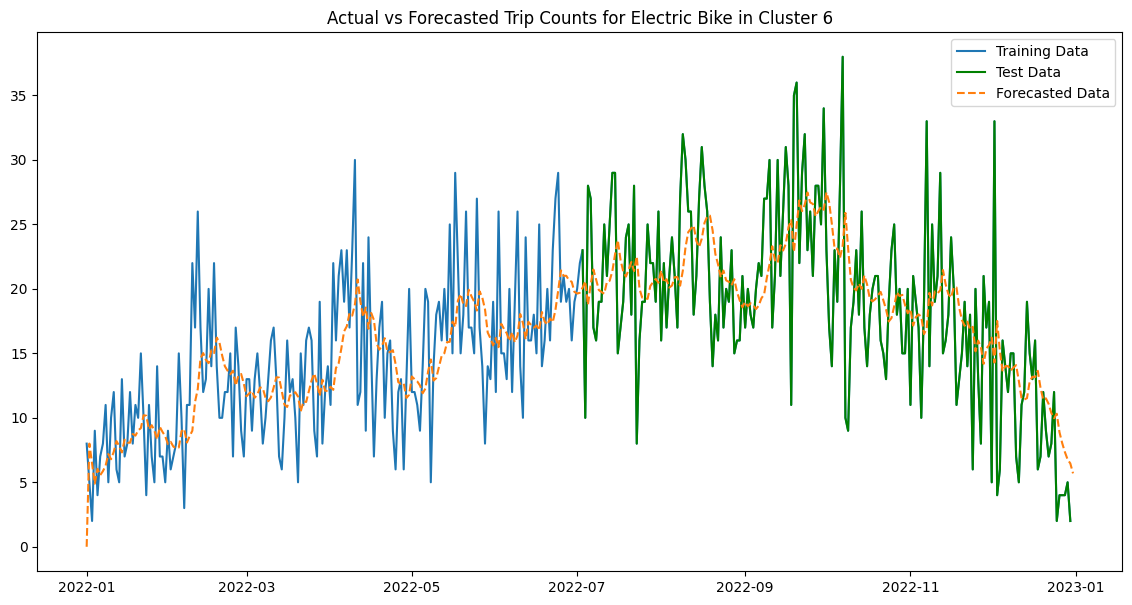

In [33]:
# Call the function to plot for cluster 0, electric bike
demand_forecasting_with_trend(6, 'electric_bike')